In [23]:
import pandas as pd
import matplotlib.pylab as plt
import matplotlib.pyplot as pltt
import seaborn as sns
import numpy as np
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import log_loss
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score, roc_curve

In [4]:
df1=pd.read_csv("Downloads/training_set_features.csv")
df1.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [5]:
df2=pd.read_csv('Downloads/training_set_labels.csv')
df2.head()

,respondent_id,xyz_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [6]:
df1['xyz_vaccine']=df2['xyz_vaccine']
df1['seasonal_vaccine']=df2['seasonal_vaccine']
df1.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,xyz_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [7]:
df1.shape

(26707, 38)

In [8]:
df1.isnull().sum()

respondent_id                      0
xyz_concern                       92
xyz_knowledge                    116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_xyz                 2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_xyz_vacc_effective       391
opinion_xyz_risk                 388
opinion_xyz_sick_from_vacc       395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [9]:
columns_to_drop = ['health_insurance', 'employment_industry', 'employment_occupation']

# Check if the columns exist before attempting to drop them
for column in columns_to_drop:
    if column not in df1.columns:
        print(f"Column '{column}' not found in df1")

In [10]:
from sklearn.preprocessing import OrdinalEncoder
df1.drop(['health_insurance','employment_industry','employment_occupation'],axis=1,inplace=True)
modes = df1.mode().iloc[0]

# Fill missing values with the mode of each column
df1.fillna(modes, inplace=True)

ord_enc = OrdinalEncoder()
df1["age_group"] = ord_enc.fit_transform(df1[["age_group"]])
df1["education"] = ord_enc.fit_transform(df1[["education"]])
df1["race"] = ord_enc.fit_transform(df1[["race"]])
df1["sex"] = ord_enc.fit_transform(df1[["sex"]])
df1["income_poverty"] = ord_enc.fit_transform(df1[["income_poverty"]])
df1["marital_status"] = ord_enc.fit_transform(df1[["marital_status"]])
df1["rent_or_own"] = ord_enc.fit_transform(df1[["rent_or_own"]])
df1["employment_status"] = ord_enc.fit_transform(df1[["employment_status"]])
df1["hhs_geo_region"] = ord_enc.fit_transform(df1[["hhs_geo_region"]])
df1["census_msa"] = ord_enc.fit_transform(df1[["census_msa"]])

df1[["age_group","education","race","sex","income_poverty","marital_status"]].head(21)

,age_group,education,race,sex,income_poverty,marital_status
0,3.0,1.0,3.0,0.0,2.0,1.0
1,1.0,0.0,3.0,1.0,2.0,1.0
2,0.0,2.0,3.0,1.0,0.0,1.0
3,4.0,0.0,3.0,0.0,2.0,1.0
4,2.0,3.0,3.0,0.0,0.0,0.0
5,4.0,0.0,3.0,1.0,0.0,0.0
6,3.0,1.0,3.0,1.0,0.0,1.0
7,2.0,3.0,3.0,0.0,0.0,0.0
8,2.0,2.0,3.0,1.0,1.0,0.0
9,3.0,0.0,3.0,1.0,0.0,1.0


In [ ]:
X = df1.drop(['respondent_id','xyz_vaccine','seasonal_vaccine'], axis=1)
y = df1['xyz_vaccine']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3,random_state=42)
clf = RandomForestRegressor(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_val)
y_pred_binary = (y_pred >= 0.5).astype(int)
f1 = f1_score(y_val, y_pred_binary)
print(f"F1 score: {f1}")
auc_score = roc_auc_score(y_val, y_pred)
print("AUC-ROC Score:", auc_score)
mse=mean_squared_error(y_val, y_pred_binary)
print(mse)

In [25]:
X = df1.drop(['respondent_id','xyz_vaccine','seasonal_vaccine'], axis=1)
y = df1['seasonal_vaccine']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3,random_state=42)
clf2 = RandomForestRegressor(n_estimators=100, random_state=42)
clf2.fit(X_train, y_train)
y_pred=clf2.predict(X_val)
y_pred_binary = (y_pred >= 0.6).astype(int)
f1 = f1_score(y_val, y_pred_binary)
print(f"F1 score: {f1}")
auc_score = roc_auc_score(y_val, y_pred)
print("AUC-ROC Score:", auc_score)
mse=mean_squared_error(y_val, y_pred_binary)
print(mse)

F1 score: 0.7035130224106603
AUC-ROC Score: 0.8391801251759625
0.24435292649444654


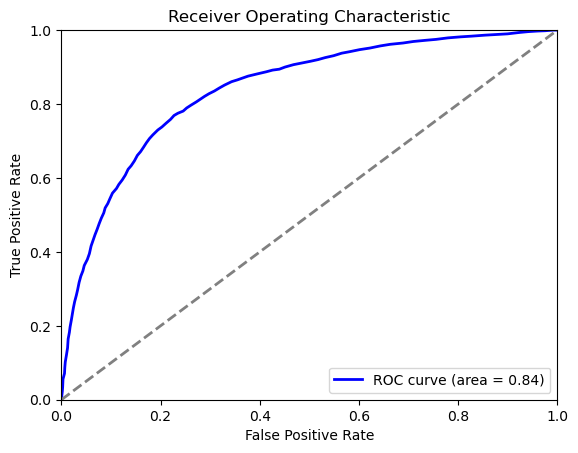

In [27]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [67]:
df3=pd.read_csv('Downloads/test_set_features.csv')
df3.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


In [69]:
df3.isnull().sum()

respondent_id                      0
xyz_concern                       85
xyz_knowledge                    122
behavioral_antiviral_meds         79
behavioral_avoidance             213
behavioral_face_mask              19
behavioral_wash_hands             40
behavioral_large_gatherings       72
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_xyz                 2160
doctor_recc_seasonal            2160
chronic_med_condition            932
child_under_6_months             813
health_worker                    789
health_insurance               12228
opinion_xyz_vacc_effective       398
opinion_xyz_risk                 380
opinion_xyz_sick_from_vacc       375
opinion_seas_vacc_effective      452
opinion_seas_risk                499
opinion_seas_sick_from_vacc      521
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4497
m

In [70]:
df3.shape

(26708, 36)

So, as we can see from the scatterplots, variation of number of 4s with number of 6s and euns is approx linear while with other factors it is non linear.

In [71]:
from sklearn.preprocessing import OrdinalEncoder
df3.drop(['health_insurance','employment_industry','employment_occupation'],axis=1,inplace=True)
modes = df3.mode().iloc[0]

# Fill missing values with the mode of each column
df3.fillna(modes, inplace=True)

ord_enc = OrdinalEncoder()
df3["age_group"] = ord_enc.fit_transform(df3[["age_group"]])
df3["education"] = ord_enc.fit_transform(df3[["education"]])
df3["race"] = ord_enc.fit_transform(df3[["race"]])
df3["sex"] = ord_enc.fit_transform(df3[["sex"]])
df3["income_poverty"] = ord_enc.fit_transform(df3[["income_poverty"]])
df3["marital_status"] = ord_enc.fit_transform(df3[["marital_status"]])
df3["rent_or_own"] = ord_enc.fit_transform(df3[["rent_or_own"]])
df3["employment_status"] = ord_enc.fit_transform(df3[["employment_status"]])
df3["hhs_geo_region"] = ord_enc.fit_transform(df3[["hhs_geo_region"]])
df3["census_msa"] = ord_enc.fit_transform(df3[["census_msa"]])

In [82]:
df3.drop(['respondent_id'],axis=1,inplace=True)

In [79]:
df4=pd.read_csv("Downloads/submission_format.csv")
df4.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.5,0.7
1,26708,0.5,0.7
2,26709,0.5,0.7
3,26710,0.5,0.7
4,26711,0.5,0.7


In [80]:
df4.drop(['h1n1_vaccine','seasonal_vaccine'],axis=1,inplace=True)
df4.head()

,respondent_id
0,26707
1,26708
2,26709
3,26710
4,26711


In [83]:
y_test = clf.predict(df3)
y_test

array([0.15, 0.02, 0.7 , ..., 0.15, 0.03, 0.54])

In [84]:
y_test_2=clf2.predict(df3)
y_test_2

array([0.12, 0.01, 0.82, ..., 0.39, 0.31, 0.58])

In [85]:
Index=df4['respondent_id']

In [87]:
result = pd.DataFrame({
    'respondent_id': Index,
    'h1n1_vaccine': y_test,
    'seasonal_vaccine':y_test_2
})

In [88]:
result

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.15,0.12
1,26708,0.02,0.01
2,26709,0.70,0.82
3,26710,0.71,0.90
4,26711,0.38,0.63
...,...,...,...
26703,53410,0.40,0.57
26704,53411,0.21,0.36
26705,53412,0.15,0.39
26706,53413,0.03,0.31


In [ ]:
result.to_csv('Downloads/first.csv',index=False)